In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import re
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

## Entender el Problema

¿Quién sobrevivió al accidente del Titanic?

Tener una idea general de nuestro conjunto de datos

In [3]:
# importar nuestro Dataset
df = pd.read_csv("titanic.csv")

In [4]:
# ver las filas y columnas
df.shape

(891, 12)

In [5]:
# para tener alguna idea de dataset nos dejamos mostrar las primeras  filas
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# vamos a ver un resumen de las columnas: tipo, non_null, nombre de las columnas, indice
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Vamos mirar cuantos valores nulos hay en cada columna y pensamos sobre su importancia, y si lo reemplazmos los 0 o eleminamos las columnas
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Al observar detenidamente, parece que solo hay 2 valores nulos en 'Embarked'. Aun así, vamos a eliminar toda la columna, ya que no nos ofrece ningún dato de interés. 'Cabin' tiene muchos valores nulos, y además, el número o nombre de la cabina no aporta ningún valor significativo, por lo que también la eliminamos. Seguramente existe una correlación entre la supervivencia y el lugar de embarque, la cabina y la clase, pero la más fácil y efectiva para esta correlación, en mi opinión, es tomar 'Pclass'. Por lo tanto, vamos a eliminar 'Cabin', 'Embarked' y 'Ticket'. También importa para sobrevivir en qué lugar estaba cada uno en la hora del accidente.

In [8]:
# axis=1 borramos la columna 
# inplace=True lo actualizmos el Dataframe df 
df.drop(['Embarked', 'Cabin', 'Ticket'], axis=1, inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [10]:
# Cantidad de "0" en 'Age' 
null_count = df['Age'].isnull().sum()

# Total de valores de 'Age'
total_count = df['Age'].count()

# porecentajae que vamos a rellenar
percent_filled = round((null_count / total_count) * 100, 2)

print(f"Vamos a rellenar {null_count} valores en age que seria un:", percent_filled, "%")

# Median de la edad
median_age = df['Age'].median()

# poner median_age in los valores que null 
df['Age'].fillna(median_age, inplace=True)
print("El Valor median que se ha cogido para implenmetar es:", median_age, "años")


# Crea una nueva columna 'Age_without' copiando los valores de 'Age'
#df['Age_without'] = df['Age']
# Rellena los valores NaN en 'Age_without' con la mediana de 'Age'
#df['Age_without'].fillna(median_age, inplace=True)

Vamos a rellenar 177 valores en age que seria un: 24.79 %
El Valor median que se ha cogido para implenmetar es: 28.0 años


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10980\2325664405.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


También hemos probado dejar los 0 en 'Age' y hemos creado otra columna con los 0, pero los resultados no cambiaron mucho en el mapa de calor y en el Describe() cambió solo dos años más o menos. Lo hemos dado por bueno y vamos a rellenarlo.

In [11]:

num_fare_zero = (df['Fare'] == 0).sum()
print("Cantidad de 0 en 'Fare':", num_fare_zero)
#df = df[df['Fare'] != 0]
#num_fare_zero = (df['Fare'] == 0).sum()


Cantidad de 0 en 'Fare': 15


Hemos visto que hay 15 entradas de 0 en 'Fare'. Dado que creemos y hemos visto que influye bastante, vamos a rellenarlas con el valor mediano.

In [12]:
# Cantidad de "0" en 'Fare' 
zero_count = (df['Fare'] == 0).sum()

# Total de valores de 'Fare'
total_count = df['Fare'].count()

# Porcentaje que representan los valores 0
percent_zero = round((zero_count / total_count) * 100, 2)

print(f"Hemos encontrado {zero_count} valores de 'Fare' que son 0, lo que representa un {percent_zero}%.")

# Mediana del 'Fare'
median_fare = df['Fare'].median()

# Reemplazar los valores 0 en 'Fare' con la mediana
df.loc[df['Fare'] == 0, 'Fare'] = median_fare

# Median de la edad
median_fare = df['Fare'].median()

# poner median_fare in los valores que null 
df['Fare'].fillna(median_fare, inplace=True)
print("El Valor median que se ha cogido para implenmetar es:", median_fare, "fare")


Hemos encontrado 15 valores de 'Fare' que son 0, lo que representa un 1.68%.
El Valor median que se ha cogido para implenmetar es: 14.4542 fare


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10980\1458871049.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(median_fare, inplace=True)


In [13]:
#vamos hacer un tail para mirar los datos para aprender y reconcer patrones
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.45
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75


Vamos empezar hacer un Codigo para investigar con los apellidos y nombres y si estan bien SibSp y Parch

Los dos siguientes códigos los hemos hecho para filtrar entre los nombres y comprobar si la relación entre 'SibSp' y 'Parch' está bien en los resultados.
El fin de esto era poder clasificar familias, familias con niños, etc.

In [14]:
# funcion para filtrar segun Apellido
def filter_by_lastname(df, lastname):
    nombres_apellido = df[df['Name'].str.contains(lastname, na=False)]
    return nombres_apellido

# Introducir el apellido lo que esta buscando
xname = input(str("Introduzca el nombre que busca"))

# Filtrar las filas que tienen el mismo apellido
resultado_df = filter_by_lastname(df, xname)

# Anzeigen der Ergebnisse
print("Nombres con el apellido: '{}':".format(xname))
print(resultado_df)

Nombres con el apellido: 'Dooley':
     PassengerId  Survived  Pclass                 Name   Sex   Age  SibSp  \
890          891         0       3  Dooley, Mr. Patrick  male  32.0      0   

     Parch  Fare  
890      0  7.75  


In [15]:
# Función para filtrar las filas con el nombre especificado comun era para combrobar si concidencias entre Parch y SibSp
# porque hemos detectado irregulidades 
def filter_by_name(df, name):
    nombres_con_nombre = df[df['Name'].str.contains(name, case=False, regex=True, na=False)]
    return nombres_con_nombre

# Nombre que deseas filtrar
nombre_a_buscar = input("Introduce un nombre que quieras buscar: ")

# Filtrar las filas con el nombre especificado
df_filtrado = filter_by_name(df, nombre_a_buscar)

# Mostrar los resultados
print("Nombres con el nombre '{}':".format(nombre_a_buscar))
print(df_filtrado)

Nombres con el nombre 'Johnston':
     PassengerId  Survived  Pclass                                      Name  \
783          784         0       3                    Johnston, Mr. Andrew G   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex   Age  SibSp  Parch   Fare  
783    male  28.0      1      2  23.45  
888  female  28.0      1      2  23.45  


Hemos intentado establecer una relación entre 'SibSp' y 'Parch'. El primer código busca a todos aquellos que comparten el mismo apellido, y el segundo busca aquellos que contienen el nombre que estamos buscando en 'name'. Queremos saber si podemos determinar el tamaño de una familia según los datos que hemos verificado. Según los datos, hemos comprobado que las mujeres casadas adoptan los apellidos de sus maridos, y su nombre antes de casarse está entre paréntesis.

En el último caso de 'Parch', cuando asumimos que la persona se cuenta a sí misma también. Las mujeres adoptarían el apellido del marido y su nombre estaría entre paréntesis, pero no aparece. Si fuera hermana o hermano, tendría el mismo apellido y tampoco aparece.

Hemos comprobado esto con varios nombres y nos da resultados erróneos. Dado que los datos son de 1912, podría ser que haya sido un descuido o error humano, o que no se aplique el mismo estándar para todos los pasajeros. Es posible que algunos fallos en los números de 'SibSp' y 'Parch' se deban a los que estaban a bordo, pero encontrarlos tan fácilmente nos hace dudar de la validez de los datos.

In [16]:
# Vamos a mirrar cuantos Mr. Mrs. Miss(titulos) etc tenemos
# Contar la frecuencia de los títulos en la columna 'Name'
title_counts = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()).value_counts()

print(title_counts)


Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


In [17]:
# Filtrar las filas que contienen 'Master' en algún lugar de la columna 'Name'
master_entries = df[df['Name'].str.contains(r'Master', na=False, regex=True)]

# Contar los supervivientes entre los pasajeros con título "Master"
master_survived_counts = master_entries['Survived'].value_counts()

print(master_survived_counts)

# Filtrar las filas que contienen "Master" en la columna name
master_entries = df[df['Name'].str.contains('Master\. ', na=False, regex=True)]
print(master_entries.head(5))

Survived
1    23
0    17
Name: count, dtype: int64
    PassengerId  Survived  Pclass                                Name   Sex  \
7             8         0       3      Palsson, Master. Gosta Leonard  male   
16           17         0       3                Rice, Master. Eugene  male   
50           51         0       3          Panula, Master. Juha Niilo  male   
59           60         0       3  Goodwin, Master. William Frederick  male   
63           64         0       3               Skoog, Master. Harald  male   

     Age  SibSp  Parch     Fare  
7    2.0      3      1  21.0750  
16   2.0      4      1  29.1250  
50   7.0      4      1  39.6875  
59  11.0      5      2  46.9000  
63   4.0      3      2  27.9000  


<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10980\1991734874.py:10: SyntaxWarning: invalid escape sequence '\.'
  master_entries = df[df['Name'].str.contains('Master\. ', na=False, regex=True)]


Vale, aunque no lo hemos reflejado aquí, hemos investigado sobre los títulos de los nombres aparte de los ya conocidos Mr., Miss, Mrs., etc. Jonkheer, por ejemplo, es un título nobiliario holandés; 'The Countess' es algo como duquesa; 'Master' es donde más datos había, unos 40, y era un título para niños varones. Por defecto, no creemos que podamos sacar más provecho de los "títulos" y, así, no los tenemos en cuenta por ahora.

Nos queda el resto de las columnas, donde podríamos pensar si aplicar algún filtro para preparar los datos. Las niñas, sin embargo, desde que nacen tienen el título 'Miss'.


In [18]:
# ahora vamos a ver cuando mujeres casados habia a Bordo
mrs_entries = df[df['Name'].str.contains(r'Mrs', na=False, regex=True)]
# print(master_entries.head())
num_mrs_df = mrs_entries.shape[0]
print("Cantidad de mujers casadas a bordo: ", num_mrs_df)


Cantidad de mujers casadas a bordo:  129


In [19]:
# Filtrar las mujeres casadas a bordo donde se encuentra tambien el Marido a bordo
marriage_mr_mrs = df[df['Name'].str.contains(r'Mrs', na=False, regex=True) & df['Name'].str.contains(r'Mr', na=False, regex=True) & (df['SibSp'] >= 1)]

# Contar el número de matrimonios que contienen tanto 'Mrs' como 'Mr' en el barco
marriage_mr_mrs = marriage_mr_mrs.shape[0]

print("Número de matrimonios donde estaban las dos a bordo:", marriage_mr_mrs)

Número de matrimonios donde estaban las dos a bordo: 81


para comprobar si los datos conciden vamos a mirar si hay 48 Mrs sin su marido a bordo

In [20]:
# Filtrar las filas que contienen solo 'Mrs' en el nombre y no tienen cónyuge a bordo
just_mrs = df[df['Name'].str.contains(r'Mrs', na=False, regex=True)  & (df['SibSp'] == 0)]

# Contar el número de mujeres 'Mrs' sin cónyuge a bordo
just_mrs = just_mrs.shape[0]

print("Número de mujeres 'Mrs' sin cónyuge a bordo:", just_mrs)

Número de mujeres 'Mrs' sin cónyuge a bordo: 48


Ahora hemos filtrado primero todas las mujeres casadas. Luego, aplicamos un filtro para aquellas que contienen 'Mrs' y 'Mr' (las mujeres casadas se escriben así: 'Apellido, Mrs. William (Margaret Norton)' = 'Apellido (del marido), Mrs. Nombre (del marido) (su nombre)'). Además, que tengan 'SibSp' igual o mayor que 1. Después, hemos revisado aquellas que tienen 'SibSp' igual a 0, que serían las mujeres casadas pero sin marido, y los dos resultados coinciden con el total.

Vamos a mirar cuantos matrimonios con hijos habia a Bordo

In [21]:
marriage_with_child = df[df['Name'].str.contains(r'Mrs.', na=False, regex=True) & df['Name'].str.contains(r'Mr', na=False, regex=True) & (df['SibSp'] >= 1) & (df['Parch'] >= 1)]
marriage_with_child = marriage_with_child.shape[0]
print("Número de matrimonios con hijos a bordo:", marriage_with_child)

Número de matrimonios con hijos a bordo: 31


In [22]:
marriage_without_child = df[df['Name'].str.contains(r'Mrs.', na=False, regex=True) & df['Name'].str.contains(r'Mr', na=False, regex=True) & (df['SibSp'] >= 1) & (df['Parch'] == 0)]
marriage_without_child = marriage_without_child.shape[0]
print("Número de matrimonios sin hijos a bordo:", marriage_without_child)

Número de matrimonios sin hijos a bordo: 50


In [23]:
mr_total = df[df['Name'].str.contains(r'Mr\.', na=False, regex=True)] 
print("Número de Mr sin cónyuge a bordo:", len(mr_total))
print("Numero de Mr sin conyuge a bordo:", mr_total.head(5))


Número de Mr sin cónyuge a bordo: 517
Numero de Mr sin conyuge a bordo:     PassengerId  Survived  Pclass                            Name   Sex   Age  \
0             1         0       3         Braund, Mr. Owen Harris  male  22.0   
4             5         0       3        Allen, Mr. William Henry  male  35.0   
5             6         0       3                Moran, Mr. James  male  28.0   
6             7         0       1         McCarthy, Mr. Timothy J  male  54.0   
12           13         0       3  Saundercock, Mr. William Henry  male  20.0   

    SibSp  Parch     Fare  
0       1      0   7.2500  
4       0      0   8.0500  
5       0      0   8.4583  
6       0      0  51.8625  
12      0      0   8.0500  




31 matrimonios con hijos + 48 Mrs sin conyuge = son excato los 81 Mrs en total a bordo

Ahora vamos a filtrar los matrimonios con hijos a bordo y determinar cuántos hijos tienen.

## no nos sirve el codigo abajo
Era otro Intento mas sacar provecho de SibSp y Parch y ha fallado otravez

In [ ]:
# 
# Filtrar matrimonios con hijos a bordo
matrimonios_con_hijos = df[(df['Name'].str.contains(r'Mrs.', na=False, regex=True)) & (df['Name'].str.contains(r'Mr', na=False, regex=True)) & (df['SibSp'] >= 1) & (df['Parch'] >= 1)]

# Identificar el apellido de las personas en matrimonios con hijos a bordo
matrimonios_apellidos = matrimonios_con_hijos['Name'].str.extract(r'([A-Za-z]+),')

# Contar el número de hijos con el mismo apellido que los matrimonios
num_hijos_mismo_apellido = df[(df['Parch'] >= 1) & (df['Name'].str.extract(r'([A-Za-z]+),').iloc[:, 0].isin(matrimonios_apellidos.iloc[:, 0]))].shape[0]

# Clasificar en el número de familias con estos criterios
num_familias_con_hijos_mismo_apellido = matrimonios_apellidos.nunique()[0]

# Mostrar resultados


print("Número de hijos con el mismo apellido que los matrimonios:", num_hijos_mismo_apellido)
print("Número de familias con hijos que comparten el mismo apellido que los matrimonios:", num_familias_con_hijos_mismo_apellido)


El código anterior ha sido modificado muchas veces debido a fallos en 'SibSp' y 'Parch'. Hemos decidido descartar cualquier variable o resultado que tenga que ver con los hijos y los padres, ya que no nos han gustado ni han producido los resultados deseados. Nuestro objetivo era entender qué sucedió con las familias que viajaban con niños.


In [24]:
mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()
mode_fare = df['Fare'].mode()


print(f"El promedio de 'Fare' es {mean_fare}")
print(f"La mediana de 'Fare' es {median_fare}")
print(f"La moda de 'Fare' es {mode_fare}")







El promedio de 'Fare' es 32.44754466891134
La mediana de 'Fare' es 14.4542
La moda de 'Fare' es 0    8.05
Name: Fare, dtype: float64


In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.447545
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.570235
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


## Estadística Descriptiva

Vamos a visulaizar las differentes Columnas


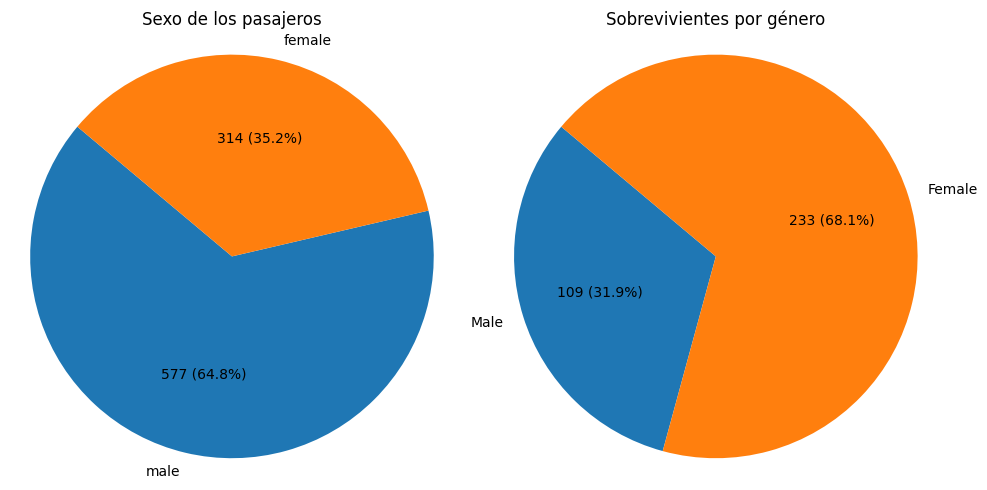

In [27]:
# Calcular los porcentajes y contar la cantidad de cada valor en la columna 'Sex'
value_counts = df['Sex'].value_counts()
total_pasajeros = len(df)  # Total de pasajeros en el DataFrame

# Calcular los porcentajes y contar la cantidad de sobrevivientes
survived_counts = df[df['Survived'] == 1]['Sex'].value_counts()
total_sobrevivientes = survived_counts.sum()

# Calcular los porcentajes de sobrevivientes en relación con el total de hombres y mujeres
survived_percentage_male = (survived_counts['male'] / value_counts['male']) * 100
survived_percentage_female = (survived_counts['female'] / value_counts['female']) * 100

# Crear una figura con dos subtramas (una al lado de la otra)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico para la distribución de género de todos los pasajeros
axes[0].pie(value_counts, labels=value_counts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * total_pasajeros / 100, p),
            startangle=140)
axes[0].set_title('Sexo de los pasajeros')
axes[0].axis('equal')  # Asegurar que el gráfico sea un círculo

# Gráfico para la distribución de género de los sobrevivientes
axes[1].pie([survived_counts['male'], survived_counts['female']], labels=['Male', 'Female'],
            autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * total_sobrevivientes / 100, p),
            startangle=140)
axes[1].set_title('Sobrevivientes por género')
axes[1].axis('equal')  # Asegurar que el gráfico sea un círculo

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()



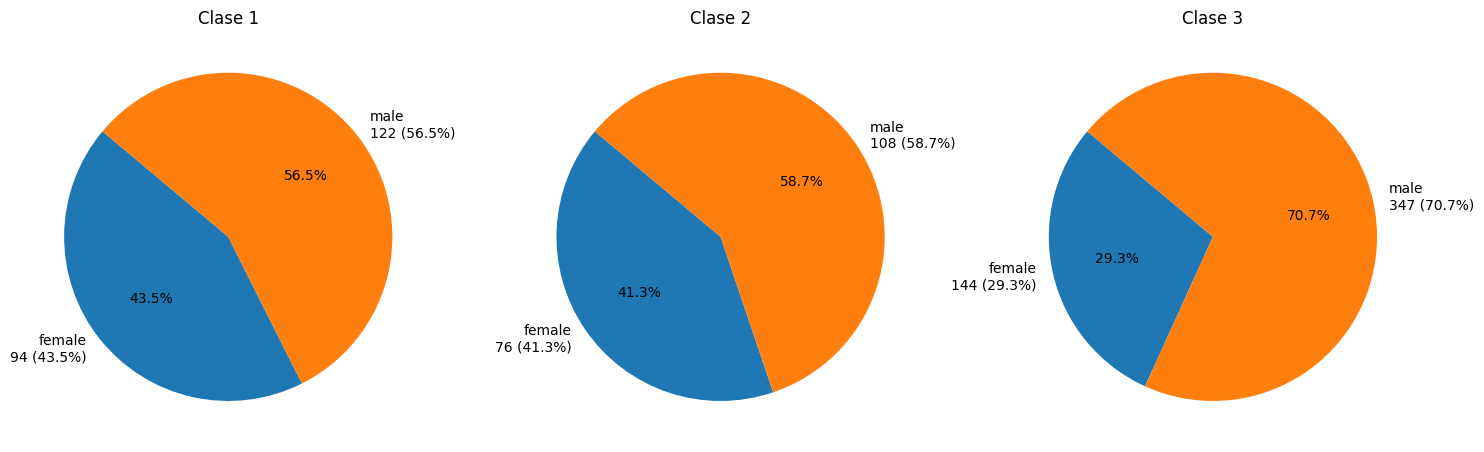

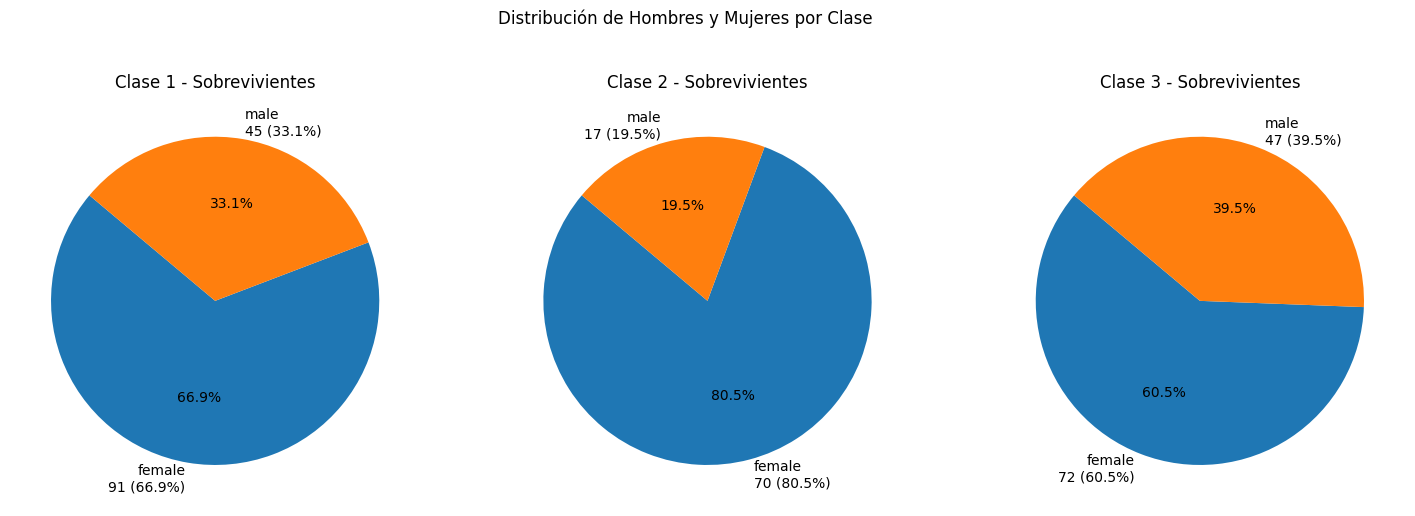

<Figure size 1600x900 with 0 Axes>

In [28]:
# Agrupar los datos por clase y sexo
grouped = df.groupby(['Pclass', 'Sex']).size().unstack()

# Calcular los porcentajes
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Crear el gráfico de pastel para cada clase
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, pclass in enumerate(grouped.index):
    counts = grouped.loc[pclass]
    percents = percentages.loc[pclass]
    labels = [f'{sex}\n{count} ({percent:.1f}%)' for sex, count, percent in zip(counts.index, counts, percents)]
    
    axes[i].pie(counts, labels = labels, autopct='%1.1f%%', startangle = 140)
    axes[i].set_title(f'Clase {pclass}')
# Filtrar el DataFrame para incluir solo los casos donde 'Survived' es igual a 1
survived_df = df[df['Survived'] == 1]

# Agrupar los datos filtrados por clase y sexo
grouped_survived = survived_df.groupby(['Pclass', 'Sex']).size().unstack()

# Calcular los porcentajes
percentages_survived = grouped_survived.div(grouped_survived.sum(axis=1), axis=0) * 100

# Crear el gráfico de pastel para cada clase
fig, axes = plt.subplots(1, 3, figsize=(18, 6))



for i, pclass in enumerate(grouped_survived.index):
    counts_survived = grouped_survived.loc[pclass]
    percents_survived = percentages_survived.loc[pclass]
    labels_survived = [f'{sex}\n{count} ({percent:.1f}%)' for sex, count, percent in zip(counts_survived.index, counts_survived, percents_survived)]
    
    axes[i].pie(counts_survived, labels=labels_survived, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Clase {pclass} - Sobrevivientes')
    

# No sé porque no se pone el titulo en la primer grafica
plt.suptitle('Distribución de Hombres y Mujeres por Clase')
plt.show()
    
plt.suptitle('Distribución de Sobrevivientes por Clase y Sexo')
plt.show()




In [29]:
# vamos a seperar las pasajeros por "titulos" como Mrs. Miss. Mr. etc
passenger_titles = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# vamos a flitrar que nos muestre solo las categorias donde hay mas de 10 personas
passenger_counts = passenger_titles.value_counts()
#passenger_counts = passenger_counts[passenger_counts > 10]

# ahora aplicamos encima de este Filtro las Personas que han sobrevivido
survived_titles = df[df['Survived'] == 1]['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
survived_counts = survived_titles.value_counts()

# Calcular el total de pasajeros para cada título
total_passengers_per_title = passenger_counts

# Calcular el % de sobrevivientes para cada título
percentage_mr = round((survived_counts.get('Mr', 0) / total_passengers_per_title.get('Mr', 1)) * 100, 2) if 'Mr' in total_passengers_per_title else 0
percentage_miss = round((survived_counts.get('Miss', 0) / total_passengers_per_title.get('Miss', 1)) * 100, 2) if 'Miss' in total_passengers_per_title else 0
percentage_mrs = round((survived_counts.get('Mrs', 0) / total_passengers_per_title.get('Mrs', 1)) * 100, 2) if 'Mrs' in total_passengers_per_title else 0
percentage_master = round((survived_counts.get('Master', 0) / total_passengers_per_title.get('Master', 1)) * 100, 2) if 'Master' in total_passengers_per_title else 0


print("Supervivencia según título:")
print(survived_counts)
print("\nPorcentaje de cuántos Mr. han sobrevivido:", percentage_mr, "%")
print("Porcentaje de cuántos Miss han sobrevivido:", percentage_miss, "%")
print("Porcentaje de cuántos Mrs. han sobrevivido:", percentage_mrs, "%")
print("Porcentaje de cuántos Master han sobrevivido:", percentage_master, "%")




# el Print era para compobar el % con el total de passajeros de cada Categoria
#print(passenger_counts)

Supervivencia según título:
Name
Miss            127
Mrs              99
Mr               81
Master           23
Dr                3
Mlle              2
Mme               1
Ms                1
Major             1
Sir               1
Lady              1
Col               1
the Countess      1
Name: count, dtype: int64

Porcentaje de cuántos Mr. han sobrevivido: 15.67 %
Porcentaje de cuántos Miss han sobrevivido: 69.78 %
Porcentaje de cuántos Mrs. han sobrevivido: 79.2 %
Porcentaje de cuántos Master han sobrevivido: 57.5 %


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10980\1116249188.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set3')


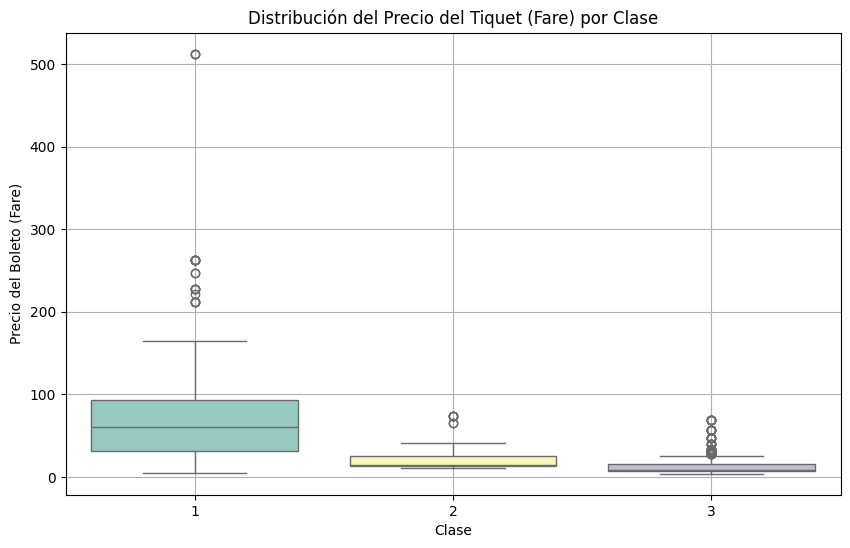

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diagrama de Caja de Fare por Clase
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set3')
plt.title('Distribución del Precio del Tiquet (Fare) por Clase')
plt.xlabel('Clase')
plt.ylabel('Precio del Boleto (Fare)')
plt.grid(True)
plt.show()


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10980\1328482950.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


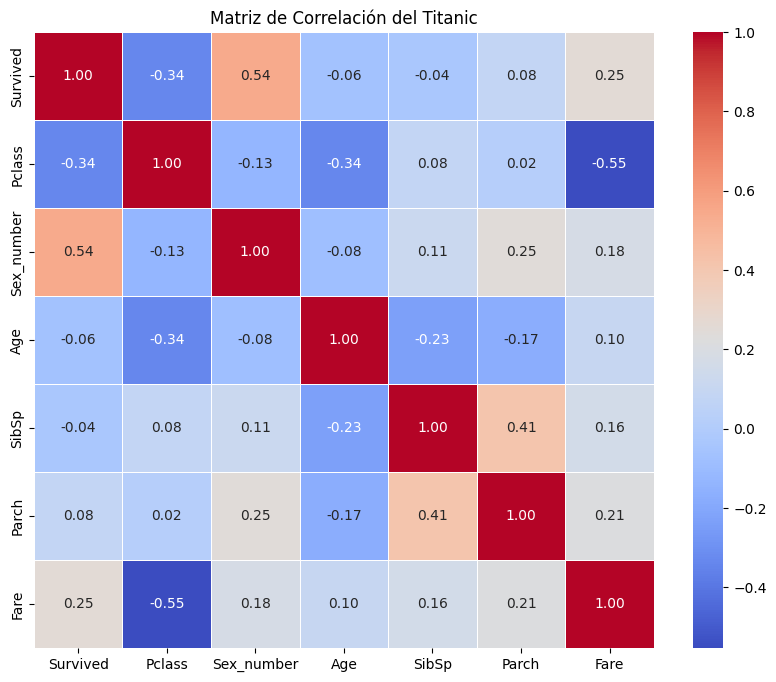

In [33]:

# Cargar los datos del Titanic
#df = pd.read_csv("titanic.csv")

# Codificar variables categóricas (por ejemplo, género)
df["Sex_number"] = df["Sex"].map({"male": 0, "female": 1})

# Manejar valores perdidos (por ejemplo, imputar la edad con la mediana)
df["Age"].fillna(df["Age"].median(), inplace=True)

# Seleccionar variables relevantes
selected_features = ["Survived", "Pclass", "Sex_number", "Age", "SibSp", "Parch", "Fare"]
selected_data = df[selected_features]

# Calcular la matriz de correlación
correlation_matrix = selected_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación del Titanic")
plt.show()


Como hemos ya antes visto que todos tienen un Titulo vamos aprovechar lo y transformar lo en Numeros

In [34]:

# Primero, extraemos los títulos de los nombres
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Asignamos un número a cada título
title_mapping = {
    'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5, 'Rev': 6,
    'Mlle': 7, 'Major': 8, 'Col': 9, 'the Countess': 10, 'Capt': 11,
    'Ms': 12, 'Sir': 13, 'Lady': 14, 'Mme': 15, 'Don': 16, 'Jonkheer': 17
}

# Creamos una nueva columna 'Title_Num' con los valores numéricos asignados
df['Title_Num'] = df['Title'].map(title_mapping)

# Imprimimos las primeras filas del DataFrame para verificar
print(df.head(5))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare  Sex_number Title  Title_Num  
0      0   7.2500           0    Mr          1  
1      0  71.2833           1   Mrs          3  
2      0   7.9250           1  Miss          2  
3      0  53.1000           1   Mrs          3  
4      0   8.0500           0    Mr          1  


Vamos a agrupar los edades en diferentes etapas


In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Sex_number,Title,Title_Num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,Mr,1


In [86]:
#Vamos a agrupar la Edad en varios grupos
# 0 0-3 años 
#  1 4-14 años
# 2 15-21 años
# 3 22-45 años
# 4 46-60 años
# 5 60+ años

In [36]:

# Definir las categorías de edad y asignar números
bins = [0, 4, 15, 22, 46, 61, float('inf')]
labels = [0, 1, 2, 3, 4, 5]

# Crear la nueva columna de grupos de edad
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Asegurarse de que la nueva columna sea de tipo numérico
df['age_group'] = df['age_group'].astype(int)

# Mostrar las primeras filas del DataFrame con todas las columnas
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare  Sex_number Title  Title_Num  age_group  
0      0   7.2500           0    Mr          1          3  
1      0  71.2833           1   Mrs          3          3  
2      0   7.9250           1  Miss          2          3  
3      0  53.1000           1   Mrs          3          3  
4      0   8.0500   

In [37]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Sex_number', 'Title', 'Title_Num', 'age_group'],
      dtype='object')


In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Sex_number,Title,Title_Num,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,Mr,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,Mrs,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,Miss,2,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,Mrs,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,Mr,1,3


In [39]:
# Preprocesamiento de datos
# Supongamos que queremos usar las columnas 'Fare', 'Pclass', 'Age' y 'Sex' como características
X = df[['Pclass','Fare', 'Title_Num', 'Sex_number', 'age_group' ]]


# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir la variable objetivo
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir métricas de evaluación
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.7877094972067039
Confusion Matrix:
[[86 19]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



__Resumen del analisis:__ 

Habia bastante mas hombre que mujeres a bordo, pero luego han sobrevido casi un 70 % de los mujeres y de los hombres solo un 30%. en los primeros dos clasea habia mas hombres que mujeres casi un 20 % mas, sin embargo el 3 clase habia un 70% de hombres . ya en los sobrevivientes cambia bastante la cosa, un 67, 81 y 60% de las tres clases de los sobrevivientes eran mujeres. En la matriz estamos confirmando que el genero tiene que ver con la  Supervivienca. tambien es obivo cuanto mas pagas en Fare mayor es tu clase, en este caso cerca de cero por la primera clase es 1 y no 3. Ya despues cambiamos valores del Sexo y Titulos de strings a numeros y creamos nuevas Columnas para la Regresion logistica! Tambien hemos metido los Edades en grupos .Tambien hemos echo un Regresion donde no hemos metido los 15 datos de Fare con el median, ni tampoco hemos rellenado los 177 Valores 0 en Age ademas hemos metido SibSp y Parch, pero los resultados han sido similiar!
Los datos confirman que siendo mujer había más probabilidades de sobrevivir en cualquier clase, aunque más se han salvado en segunda clase. Los hombres sobrevivieron igual que en la primera y tercera clase, pero menos que en segunda, donde había muchas más mujeres que hombres sobreviviendo. No sabemos exactamente a qué se debe esto.
